Chapter 19
# 可视化偏导数
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
from sympy import lambdify, diff, exp, latex, simplify
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm

## 创建数据

In [2]:
num = 301; # number of mesh grids
x_array = np.linspace(-3,3,num)
y_array = np.linspace(-3,3,num)

xx,yy = np.meshgrid(x_array,y_array)

## 二元函数

In [3]:
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
f_xy_zz = f_xy_fcn(xx,yy)

## 沿x方向切线

In [4]:
x_s = np.linspace(-2.4,2.4,9)
y_s = np.linspace(-2.4,2.4,9)

xx_s, yy_s = np.meshgrid(x_s, y_s)

# 符号偏导
df_dx = f_xy.diff(x)
df_dx_fcn = lambdify([x,y],df_dx)

In [5]:
# 定义函数绘制沿x方向切线
def plot_d_x_tangent(x_t, y_t, df_dx_fcn, f_xy_fcn, color, ax):
    
    # 计算切线斜率 (偏导数)
    k = df_dx_fcn(x_t, y_t)
    # 小彩灯z轴位置，切点坐标 (x_t,y_t,z_t)
    z_t = f_xy_fcn(x_t, y_t)
    # 切线x轴数组
    x_array = np.linspace(x_t-0.6,x_t+0.6, 10)
    # 切线函数
    z_array = k*(x_array - x_t) + z_t
    # 绘制切线
    ax.plot(x_array,x_array*0 + y_t, z_array, color = color, lw = 0.2)
    # 绘制小彩灯 (切点)
    ax.plot(x_t,y_t, z_t, color = color, 
              marker = '.', markersize = 5)
    

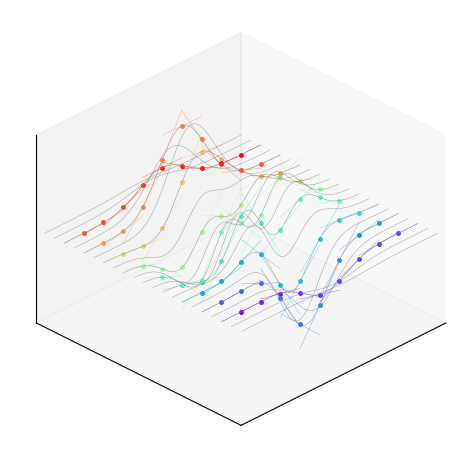

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, f_xy_zz,
                  color = [0.5,0.5,0.5],
                  rstride=15, cstride=0,
                  linewidth = 0.25)

colors = plt.cm.rainbow(np.linspace(0,1,len(xx_s.ravel())))

for i in np.linspace(0,len(xx_s.ravel())-1,len(xx_s.ravel())):
    
    i = int(i)
    
    x_t = xx_s.ravel()[i]
    y_t = yy_s.ravel()[i]
    
    color = colors[i,:]

    plot_d_x_tangent(x_t, y_t, df_dx_fcn, f_xy_fcn, color, ax)

ax.set_proj_type('ortho')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)
# ax.view_init(azim=-90, elev=0)

plt.tight_layout()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.savefig('1.svg')
plt.show()

## 沿y方向切线

In [7]:
df_dy = f_xy.diff(y)
df_dy_fcn = lambdify([x,y],df_dy)

# 定义函数绘制沿y方向切线
def plot_d_y_tangent(x_t, y_t, df_dy_fcn, f_xy_fcn, color, ax):
    
    k = df_dy_fcn(x_t, y_t)
    z_t = f_xy_fcn(x_t, y_t)
    
    y_array = np.linspace(y_t-0.6,y_t+0.6, 10)
    z_array = k*(y_array - y_t) + z_t
    
    ax.plot(y_array*0 + x_t,y_array, z_array, color = color, lw = 0.2)
    # partial x1, tangent line
    
    ax.plot(x_t, y_t, z_t, color = color, 
              marker = '.', markersize = 5)
    # tangent point

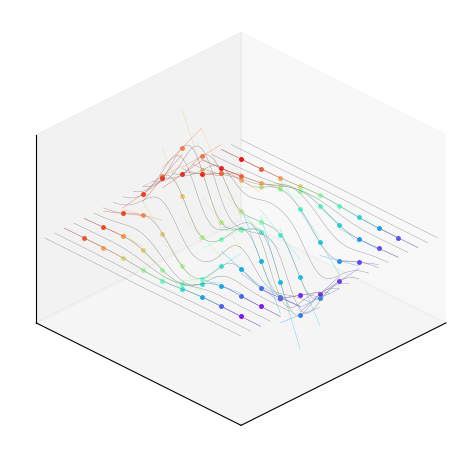

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, f_xy_zz,
                  color = [0.5,0.5,0.5],
                  rstride=0, cstride=15,
                  linewidth = 0.25)

colors = plt.cm.rainbow(np.linspace(0,1,len(yy_s.ravel())))


for i in np.linspace(0,len(yy_s.ravel())-1,len(yy_s.ravel())):
    
    i = int(i)
    
    x_t = xx_s.ravel()[i]
    y_t = yy_s.ravel()[i]
    
    color = colors[i,:]

    plot_d_y_tangent(x_t, y_t, df_dy_fcn, f_xy_fcn, color, ax)


ax.set_proj_type('ortho')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)
# ax.view_init(azim=0, elev=0)

plt.tight_layout()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()


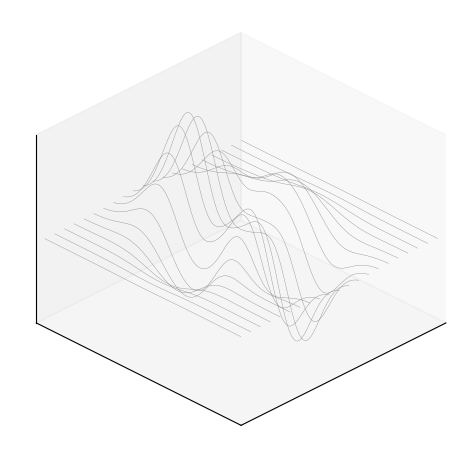

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, f_xy_zz,
                  color = [0.5,0.5,0.5],
                  rstride=0, cstride=15,
                  linewidth = 0.25)

ax.set_proj_type('ortho')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)
# ax.view_init(azim=-90, elev=0)

plt.tight_layout()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()